## Machine learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. The elbow technique
#### 3. k-means clustering

# importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Apex PC\Desktop\DATA ANALYSIS\Achievement 6 project\df_kc.csv'

In [4]:
path

'C:\\Users\\Apex PC\\Desktop\\DATA ANALYSIS\\Achievement 6 project\\df_kc.csv'

In [5]:
df_kc = pd.read_csv(os.path.join(path,))

In [6]:
df_kc.head()

Unnamed: 0.1  Unnamed: 0          id        date     price  bedrooms  \
0             0           0  7129300520  2014-10-13  221900.0         3   
1             1           1  6414100192  2014-12-09  538000.0         3   
2             2           2  5631500400  2015-02-25  180000.0         2   
3             3           3  2487200875  2014-12-09  604000.0         4   
4             4           4  1954400510  2015-02-18  510000.0         3   

   bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0       1.00         1180      5650     1.0  ...        1180              0   
1       2.25         2570      7242     2.0  ...        2170            400   
2       1.00          770     10000     1.0  ...         770              0   
3       3.00         1960      5000     1.0  ...        1050            910   
4       2.00         1680      8080     1.0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  price category  
0        5650       Low price  
1        7639    Middle price  
2        8062       Low price  
3        5000      High price  
4        7503    Middle price  

[5 rows x 24 columns]

In [7]:
df_kc.shape

(21613, 24)

# Using the elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
df_kc_new = df_kc.drop(columns=['date', 'price category'])    # dropping this 'date' and 'price category' column since it is categorical not numerical

In [10]:
num_cl = range(1, 11)   # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]   # Defines k-means clusters in the range assigned above.

In [11]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_kc_new)
df_kc_scaled = pd.DataFrame(scaled_array, columns=df_kc_new.columns)  # <== KEEP AS DataFrame

In [12]:
score = [kmeans[i].fit(df_kc_new).score(df_kc_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.788312954242552e+23,
 -3.6093763878375314e+22,
 -1.7743109999476202e+22,
 -1.002878102083142e+22,
 -6.523148125039673e+21,
 -3.919853874792365e+21,
 -2.972919641351349e+21,
 -2.524502817885505e+21,
 -1.82547434520293e+21,
 -1.4903147841674805e+21]

In [13]:
score = [kmeans[i].fit(df_kc_new).score(df_kc_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1.788312954242552e+23,
 -3.6093763878375314e+22,
 -1.7743109999476202e+22,
 -1.002878102083142e+22,
 -6.523148125039673e+21,
 -3.919853874792365e+21,
 -2.972919641351349e+21,
 -2.524502817885505e+21,
 -1.82547434520293e+21,
 -1.4903147841674805e+21]

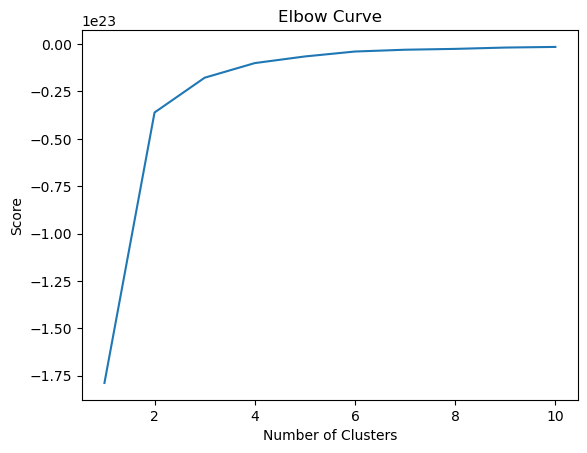

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  Based on my chart, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is eight.

# using the k_means clustering

In [15]:
# Creating the k-means object.

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_kc_new)  # This returns a 1D NumPy array

In [16]:
clusters = kmeans.fit_predict(df_kc_new)

In [17]:
df_kc_new['cluster'] = clusters

In [18]:
df_kc_new['clusters'] = kmeans.fit_predict(df_kc_new)

In [19]:
df_kc_new.head()

Unnamed: 0.1  Unnamed: 0          id     price  bedrooms  bathrooms  \
0             0           0  7129300520  221900.0         3       1.00   
1             1           1  6414100192  538000.0         3       2.25   
2             2           2  5631500400  180000.0         2       1.00   
3             3           3  2487200875  604000.0         4       3.00   
4             4           4  1954400510  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_basement  yr_built  \
0         1180      5650     1.0           0  ...              0      1955   
1         2570      7242     2.0           0  ...            400      1951   
2          770     10000     1.0           0  ...              0      1933   
3         1960      5000     1.0           0  ...            910      1965   
4         1680      8080     1.0           0  ...              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98178  47.5112 -122.257           1340        5650   
1          1991    98125  47.7210 -122.319           1690        7639   
2             0    98028  47.7379 -122.233           2720        8062   
3             0    98136  47.5208 -122.393           1360        5000   
4             0    98074  47.6168 -122.045           1800        7503   

   cluster  clusters  
0        0         0  
1        0         0  
2        0         0  
3        3         3  
4        1         1  

[5 rows x 24 columns]

In [20]:
df_kc_new['clusters'].value_counts()

clusters
3    6521
2    5987
1    5827
0    3278
Name: count, dtype: int64

In [21]:
print(df_kc.columns)
print(df_kc_new.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'date', 'price', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price category'],
      dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'cluster',
       'clusters'],
      dtype='object')


# Ploting the clusters for the "price" and "sqft_living" variables.

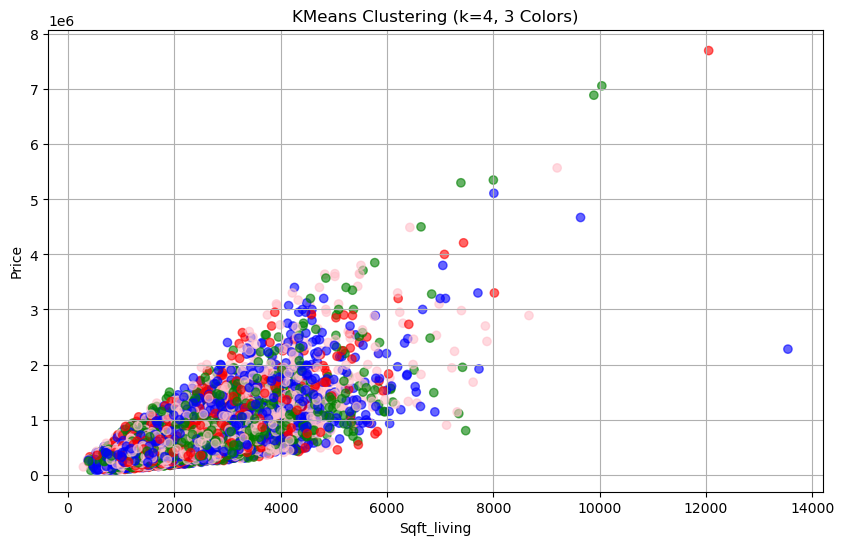

In [22]:
import matplotlib.pyplot as plt

# Map cluster labels to just 3 colors (4 clusters sharing 3 colors)
cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink'  # Reusing one of the colors
}

# Map the cluster labels to color strings
colors = df_kc_new['clusters'].map(cluster_color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_kc_new['sqft_living'],
    df_kc_new['price'],
    c=colors,
    alpha=0.6
)
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.title('KMeans Clustering (k=4, 3 Colors)')
plt.grid(True)
plt.show()


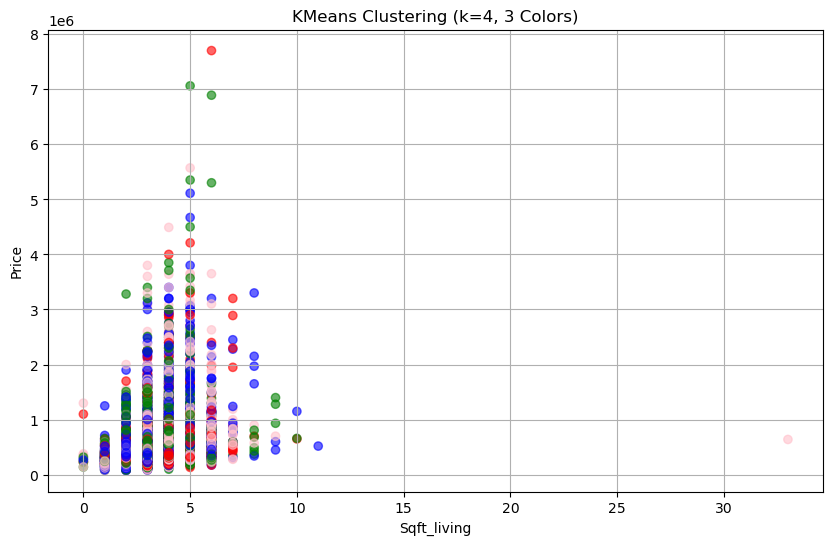

In [23]:
# Plot the clusters for the "price" and "bedrooms" variables.
import matplotlib.pyplot as plt

# Map cluster labels to just 3 colors (4 clusters sharing 3 colors)
cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink'  # Reusing one of the colors
}

# Map the cluster labels to color strings
colors = df_kc_new['clusters'].map(cluster_color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_kc_new['bedrooms'],
    df_kc_new['price'],
    c=colors,
    alpha=0.6
)
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.title('KMeans Clustering (k=4, 3 Colors)')
plt.grid(True)
plt.show()




# plotting 'sqft_above' against 'price'

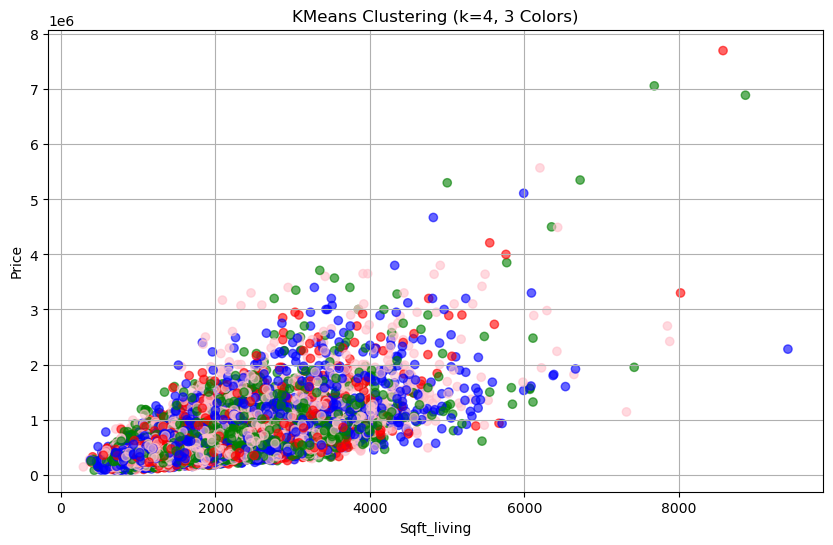

In [24]:
import matplotlib.pyplot as plt

# Map cluster labels to just 3 colors (4 clusters sharing 3 colors)
cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'pink'  # Reusing one of the colors
}

# Map the cluster labels to color strings
colors = df_kc_new['clusters'].map(cluster_color_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_kc_new['sqft_above'],
    df_kc_new['price'],
    c=colors,
    alpha=0.6
)
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.title('KMeans Clustering (k=4, 3 Colors)')
plt.grid(True)
plt.show()



# based on the various graphs plotted no visible clusters were noticed on each. Nothing can be deduced from each graph except for the fact that as each variable(bedrooms, sqft_living, sqft_above) increased 'price' also increased

In [25]:

df_kc_new.loc[df_kc_new['clusters'] == 2, 'cluster'] = 'green'
df_kc_new.loc[df_kc_new['clusters'] == 1, 'cluster'] = 'blue'
df_kc_new.loc[df_kc_new['clusters'] == 0, 'cluster'] = 'red'
df_kc_new.loc[df_kc_new['clusters'] == 3, 'cluster'] = 'pink'  


C:\Users\Apex PC\AppData\Local\Temp\ipykernel_17688\1609056600.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'green' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_kc_new.loc[df_kc_new['clusters'] == 2, 'cluster'] = 'green'


In [26]:
df_kc_new.groupby('cluster').agg({'sqft_living':['mean', 'median'], 
                         'bedrooms':['mean', 'median'], 
                         'sqft_above':['mean', 'median'],
                          'price':['mean', 'median']})

sqft_living          bedrooms          sqft_above          \
                mean  median      mean median         mean  median   
cluster                                                              
blue     2097.467479  1920.0  3.370002    3.0  1804.714090  1550.0   
green    2088.058126  1940.0  3.372140    3.0  1813.175046  1610.0   
pink     2076.810152  1900.0  3.359301    3.0  1784.120687  1550.0   
red      2039.916718  1900.0  3.392923    3.0  1722.601891  1520.0   

                 price            
                  mean    median  
cluster                           
blue     547956.971169  449900.0  
green    530016.532988  459000.0  
pink     545566.756019  450000.0  
red      534216.573520  450000.0

# The green cluster has the best stats in almost all categories. The median number of sqft_living which is 1940.0, sqft_above at 1610.0 and price at 459000.0, is a little significantly larger than the other three.
# Also, it is important to note that all variables(bedrooms, sqft_living, sqft_above) showed that as they increased 'price' also increased

# Clusters were not seen hence these results would not be useful for any future steps of an analytics pipeline.


In [27]:
path = r'C:\Users\Apex PC\Desktop\DATA ANALYSIS\Achievement 6 project'

In [28]:
df_kc_new.to_csv(os.path.join(path, 'df_new.csv'))